In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/input/df.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df.head()

,datetime,stepCount
0,2017-06-27 23:04:40,504
1,2017-06-27 23:14:34,871
2,2017-06-27 23:22:53,25
3,2017-06-27 23:29:45,29
4,2017-06-27 23:36:05,17


In [5]:
len(df)

15460

In [6]:
df['date'] = df['datetime'].dt.date

In [7]:
daySummary = df.groupby(['date']).sum()

In [8]:
daySummary.head()

,stepCount
date,
2017-06-27,1645
2017-06-28,6627
2017-06-29,6885
2017-06-30,7486
2017-07-01,5712


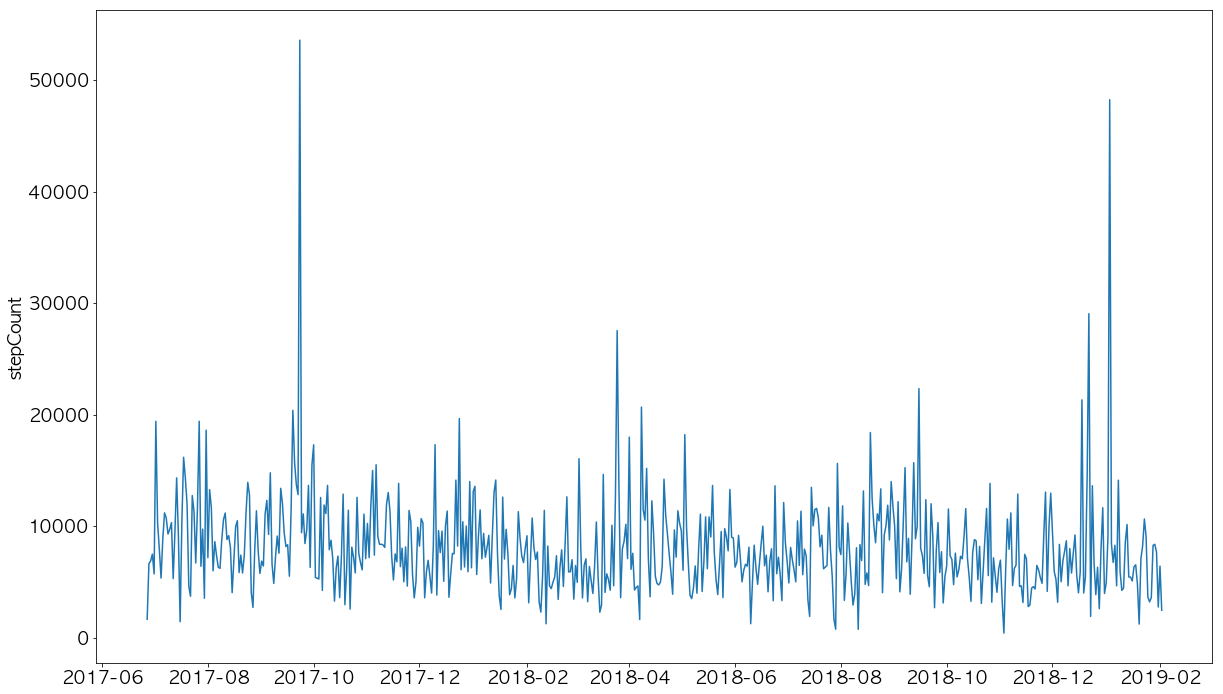

In [12]:
plt.figure(figsize=(20, 12))
plt.rcParams["font.size"] = 18
plt.ylabel('stepCount')
plt.plot(daySummary)